In [1]:
# Bereiten wir zunächst python für die Benutzung vor:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Statistische Fehler

Angenommen, wir hätten z.b. die Länge eines Tisches 10 mal gemessen, die Werte in Excel eingetragen und als .csv-Datei gespeichert. Wir können die Werte so einlesen:

In [2]:
werte = pd.read_csv('c1_werte.csv')

Sehen wir uns die Werte nun an:

In [3]:
werte

Laenge (in m)
0           1.21
1           1.19
2           1.18
3           1.22
4           1.20
5           1.21
6           1.23
7           1.19
8           1.21
9           1.20

Als Ergebnis der Messung würde man das arithmetische Mittel der Messwerte angeben. Berechnen wir den Mittelwert, und sehen wir ihn uns an:

In [4]:
mittelwert = np.average(werte)
mittelwert

1.204

Wir müssen fragen, wie genau diese Angabe ist. Haben wir damit die Tischlänge mit einer Genauigkeit von 1 mm (0.001 m) bestimmt, obwohl unser Maßstab vielleicht nur eine Ab-lesegenauigkeit von 1 cm (0.01 m) zuließ? Wie wir anhand der Tabelle sehen, weichen die Messwerte um maximal 0.05 m voneinander ab:

In [5]:
abweichungen = werte - mittelwert
abweichungen

Laenge (in m)
0          0.006
1         -0.014
2         -0.024
3          0.016
4         -0.004
5          0.006
6          0.026
7         -0.014
8          0.006
9         -0.004

Ein mögliches Maß für die Genauigkeit der Messung liefert etwa der Mittelwert Delta der jeweiligen Abweichungen vom Mittelwert:

In [ ]:
delta = np.average(np.abs(abweichungen))
delta

Würde man den Betrag "np.abs()" oben weglassen, so wäre nach Definition des Mittelwertes diese Größe stets gleich 0 und somit kein Maß für den experimentellen Fehler. Probieren wir es aus:

In [ ]:
np.average(abweichungen)

# 2. Normalverteilung, Standardabweichung

Angenommen, wir hätten die Länge der Tischkante noch ein paar weitere male gemessen. Wird ein und dieselbe Größe genügend oft gemessen, kann man eine statistische Analyse der Messreihe durchführen. Lesen wir zunächst all unsere Messwerte ein:

In [6]:
alle_werte = pd.read_csv('c1_alle_werte.csv')

Die große Anzahl der Werte macht die Tabelle eher unübersichtlich, daher machen wir besser eine grafische Darstellung. Es fällt auf, das bestimmte Messwerte nun mehrmals auftauchen, und einige häufiger als andere.

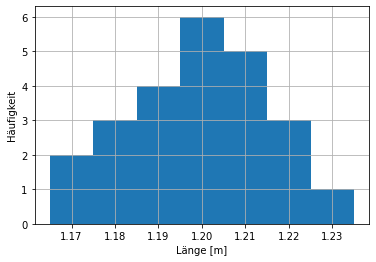

In [7]:
# Werte auftragen
plt.hist(alle_werte, bins=np.arange(1.16, 1.23, step=0.01)+0.005)

# Achsen beschriften
plt.xlabel('Länge [m]')
plt.ylabel('Häufigkeit')

# Gitterlinien für beide Achsen, zur besseren Lesbarkeit
plt.grid(True, which='both')

Im Grenzfall unendlich vieler Messwerte ergibt sich eine sog. Normalverteilung, ...

Die Python-Bibliothek Scipy hat eine Funktion für die Regression einer Normalverteilung:

In [8]:
from scipy.stats import norm

Diese funktion kann verwendet werden, um die Normalverteilung zu finden, die unsere Messwerte am besten beschreibt. Sehen wir uns den Mittelwert und die Standardabweichung dieser best-fit Normalverteilung an:

In [9]:
mittelw, std_abw = norm.fit(alle_werte)
mittelw, std_abw

(1.1991666666666665, 0.015789412767913694)

Der plt.hist-Funktion kann ein parameter namens "Density" übergeben werden. Dann gibt die y-Achse die relative Häufigkeit (in Prozent) an. Dies erlaubt den direkten Vergleich mit der oben ermittelten Normalverteilung, die ebenfalls relative Häufigkeiten beschreibt:

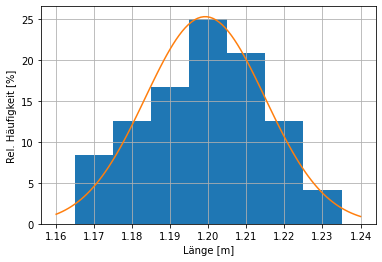

In [10]:
# Werte auftragen
plt.hist(alle_werte,
         bins=np.arange(1.16, 1.23, step=0.01)+0.005,
         density=True)

# normalverteilung auftragen
x = np.linspace(1.16, 1.24, num=100)
y = norm.pdf(x, mittelw, std_abw)
plt.plot(x, y)

# Achsen beschriften
plt.xlabel('Länge [m]')
plt.ylabel('Rel. Häufigkeit [%]')

# Gitterlinien für beide Achsen, zur besseren Lesbarkeit
plt.grid(True, which='both')